# Quantitative Precipitation Estimation

---

### ARCO Data Access

Canadian data was converted into Analysis-Ready Cloud-Optimized and can be accessed as follows

In [3]:
import xarray as xr
import icechunk

Configure S3 storage for [icechunk](https://icechunk.io/en/latest/). In this case we will analyze Ontario Derecho event. However, you can change it uncommenting the other prefix lines

In [4]:
storage = icechunk.s3_storage(
    bucket='pythia',
    # prefix='radar/ams2025/CASSM.zarr', # Calgary Hail Storm
    prefix='radar/ams2025/CASET.zarr', # CASET Ontario Derecho
    # prefix='radar/ams2025/CASKR.zarr', # CASKR Ontario Derecho
    endpoint_url='https://js2.jetstream-cloud.org:8001',
    anonymous=True,
    region='us-east-1',
    force_path_style=True
)

Creating S3 bucket connection and immutable session

In [5]:
repo = icechunk.Repository.open(storage=storage)
session = repo.readonly_session("main")

Opening the Radar datatree using `xarray`

In [6]:
dtree = xr.open_datatree(
    session.store, 
    engine="zarr",
    consolidated=False,
    chunks={}
)

In [7]:
dtree

<xarray.DataTree>
Group: /
├── Group: /georeferencing_correction
│       Dimensions:    (vcp_time: 39)
│       Coordinates:
│           altitude   float64 8B ...
│           longitude  float64 8B ...
│           latitude   float64 8B ...
│         * vcp_time   (vcp_time) datetime64[ns] 312B 2022-05-21T14:54:03 ... 2022-05...
├── Group: /sweep_15
│       Dimensions:            (vcp_time: 39, azimuth: 720, range: 480)
│       Coordinates:
│           altitude           float64 8B ...
│           longitude          float64 8B ...
│         * azimuth            (azimuth) float64 6kB 0.25 0.75 1.25 ... 359.2 359.8
│           elevation          (azimuth) float64 6kB dask.array<chunksize=(720,), meta=np.ndarray>
│           latitude           float64 8B ...
│           time               (azimuth) datetime64[ns] 6kB dask.array<chunksize=(720,), meta=np.ndarray>
│           crs_wkt            int64 8B ...
│         * range              (range) float32 2kB 250.0 750.0 ... 2.392e+05 2.398e+05
│         * vcp_time           (vcp_time) datetime64[ns] 312B 2022-05-21T14:54:03 ......
│           y                  (azimuth, range) float64 3MB dask.array<chunksize=(180, 240), meta=np.ndarray>
│           z                  (azimuth, range) float64 3MB dask.array<chunksize=(180, 240), meta=np.ndarray>
│           x                  (azimuth, range) float64 3MB dask.array<chunksize=(180, 240), meta=np.ndarray>
│       Data variables:
│           TH                 (vcp_time, azimuth, range) float32 54MB dask.array<chunksize=(1, 720, 480), meta=np.ndarray>
│           SQIH               (vcp_time, azimuth, range) float32 54MB dask.array<chunksize=(1, 720, 480), meta=np.ndarray>
│           UPHIDP             (vcp_time, azimuth, range) float32 54MB dask.array<chunksize=(1, 720, 480), meta=np.ndarray>
│           DBZH               (vcp_time, azimuth, range) float32 54MB dask.array<chunksize=(1, 720, 480), meta=np.ndarray>
│           WRADH              (vcp_time, azimuth, range) float32 54MB dask.array<chunksize=(1, 720, 480), meta=np.ndarray>
│           ZDR                (vcp_time, azimuth, range) float32 54MB dask.array<chunksize=(1, 720, 480), meta=np.ndarray>
│           VRADH              (vcp_time, azimuth, range) float32 54MB dask.array<chunksize=(1, 720, 480), meta=np.ndarray>
│           KDP                (vcp_time, azimuth, range) float32 54MB dask.array<chunksize=(1, 720, 480), meta=np.ndarray>
│           RHOHV              (vcp_time, azimuth, range) float32 54MB dask.array<chunksize=(1, 720, 480), meta=np.ndarray>
│           PHIDP              (vcp_time, azimuth, range) float32 54MB dask.array<chunksize=(1, 720, 480), meta=np.ndarray>
│           sweep_number       (vcp_time) float64 312B dask.array<chunksize=(1,), meta=np.ndarray>
│           sweep_fixed_angle  (vcp_time) float32 156B dask.array<chunksize=(1,), meta=np.ndarray>
├── Group: /sweep_1
│       Dimensions:            (vcp_time: 39, azimuth: 360, range: 245)
│       Coordinates:
│           altitude           float64 8B ...
│           elevation          (azimuth) float64 3kB dask.array<chunksize=(360,), meta=np.ndarray>
│         * azimuth            (azimuth) float64 3kB 0.5 1.5 2.5 ... 357.5 358.5 359.5
│           crs_wkt            int64 8B ...
│           y                  (azimuth, range) float64 706kB dask.array<chunksize=(180, 123), meta=np.ndarray>
│           latitude           float64 8B ...
│         * range              (range) float32 980B 250.0 750.0 ... 1.218e+05 1.222e+05
│           longitude          float64 8B ...
│           z                  (azimuth, range) float64 706kB dask.array<chunksize=(180, 123), meta=np.ndarray>
│           x                  (azimuth, range) float64 706kB dask.array<chunksize=(180, 123), meta=np.ndarray>
│           time               (azimuth) datetime64[ns] 3kB dask.array<chunksize=(360,), meta=np.ndarray>
│         * vcp_time           (vcp_time) datetime64[ns] 312B 2022-05-21T14:54:03 ......
│       Data variabl

We have created a python script with additional functions to keep the notebook simple. If you want to check it out click [here](demo_functions.py)

In [8]:
import demo_functions as dmf

we can call the `rain_depth` function which will help us to compute QPE using Marshall and Gunn relationship

In [13]:
%%time
qpe = dmf.rain_depth(dtree["sweep_16/DBZH"])

Actual QPE integration period: 0 days, 3 hours, 54 minutes
Time span: 2022-05-21T14:54:03 to 2022-05-21T18:48:03 UTC
CPU times: user 6.55 ms, sys: 0 ns, total: 6.55 ms
Wall time: 6.53 ms


In [14]:
qpe

<xarray.DataArray 'rain_depth' (vcp_time: 39, azimuth: 720, range: 480)> Size: 54MB
dask.array<mul, shape=(39, 720, 480), dtype=float32, chunksize=(1, 720, 480), chunktype=numpy.ndarray>
Coordinates:
    altitude   float64 8B ...
  * azimuth    (azimuth) float64 6kB 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
    crs_wkt    int64 8B ...
    latitude   float64 8B ...
    elevation  (azimuth) float64 6kB dask.array<chunksize=(720,), meta=np.ndarray>
  * range      (range) float32 2kB 250.0 750.0 1.25e+03 ... 2.392e+05 2.398e+05
    longitude  float64 8B ...
    z          (azimuth, range) float64 3MB dask.array<chunksize=(180, 240), meta=np.ndarray>
    time       (azimuth) datetime64[ns] 6kB dask.array<chunksize=(720,), meta=np.ndarray>
    x          (azimuth, range) float64 3MB dask.array<chunksize=(180, 240), meta=np.ndarray>
    y          (azimuth, range) float64 3MB dask.array<chunksize=(180, 240), meta=np.ndarray>
  * vcp_time   (vcp_time) datetime64[ns] 312B 2022-05-21T14:54:03 ... 2022-05...
Attributes:
    units:          mm
    long_name:      rainfall depth
    standard_name:  rainfall_depth
    description:    Estimated rainfall depth using Z-R relationship (a=200.0,...

In [15]:
qpe_sum = qpe.sum("vcp_time")

Finally, we can create a ~4 hour QPE plot as follows:

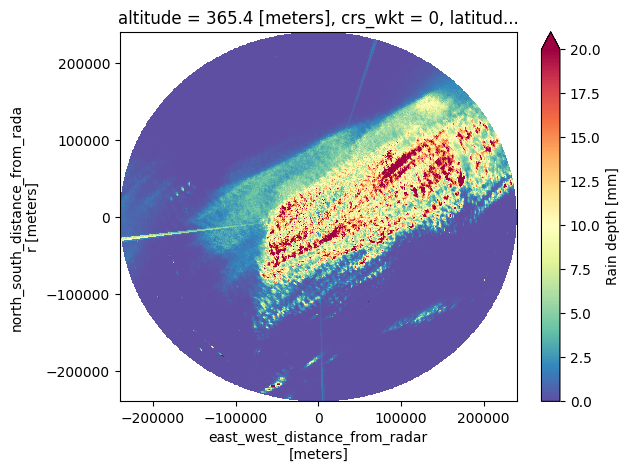

In [26]:
qpe_sum.plot(
    x="x",
    y="y",
    vmin=0, 
    vmax=20,
    robust=True,
    cmap="Spectral_r",
    cbar_kwargs={"label": "Rain depth [mm]"},
)